# Unidad 2: Modelos supervisados

In [ ]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'15W_pmAHPR2B1OMewIu1HP8bZxxuLQ1VV'})

In [ ]:
fileDownloaded.GetContentFile('csv_clima.csv')

In [ ]:
import pandas as pd
df_auto = pd.read_csv('csv_clima.csv', delimiter=',' )

df_auto.head()
df_auto.describe()

,Temperatura,Humedad
count,15.000000,15.000000
mean,73.400000,82.266667
std,6.367327,10.201307
min,64.000000,65.000000
25%,69.500000,72.500000
50%,72.000000,85.000000
75%,77.500000,90.500000
max,85.000000,96.000000


## Predicción de valores continuos con regresión lineal

### Estimación del modelo mediante mínimos cuadrados

In [ ]:
##Actualiza los valores de los parámetros mediante el gradiente y el coeficiente de aprendizaje
def stepGradient(par, x, y, learningRate):
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(x))
    
    for i in range(0, len(x)):
        b_0_gradient += (2/N) *        (y[i] - (par[0] + par[1] * x[i]))
        b_1_gradient += (2/N) * x[i] * (y[i] - (par[0] + par[1] * x[i]))
        
    #El gradiente debe calcularse para cada uno de los parámetros de forma independiente
    new_b_0 = par[0] + (learningRate * b_0_gradient)
    new_b_1 = par[1] + (learningRate * b_1_gradient)
    
    return [new_b_0, new_b_1]


#maxIter = 30 es el original, el valor de while fin es casi 120
def fitGradient(par, x, y, learningRate, maxDifference = 1e-2, maxIter = 1000):
    prev_step = par[:]
    num_iter = 0;
    
    num_iter += 1
    results = stepGradient(prev_step, trX, trY, learningRate)   
    #print("(A) Results stepGradient %.2f,%.2f" %( results[0], results[1] ) )
    difference = abs(prev_step[0] - results[0]) + abs(prev_step[1] - results[1])

    while ((difference > maxDifference) & (num_iter < maxIter)):
        num_iter += 1
        prev_step = results
        results = stepGradient(prev_step, trX, trY, learningRate) 
        print("(B) Results stepGradient(%d)  %.2f,%.2f" %( num_iter, results[0], results[1] ) )   
        difference = abs(prev_step[0] - results[0]) + abs(prev_step[1] - results[1])

    return results

##Genera un array NumPy formado por n números equiespaciados entre dos dados
##np.linspace(10, 40, 4) :: array([10., 20., 30., 40.])
trX = np.linspace(-2, 2, 101)
#print(len(trX))
#print(trX)

trY = 3 + 2 * trX + np.random.randn(*trX.shape) * 0.33
#print(len(trY))
#print(trY)

print("trX=%d , trY=%d" %( len(trX), len(trY) ) )

print(fitGradient([1,1], trX, trY, 0.05))





trX=101 , trY=101
(B) Results stepGradient(2)  1.37,1.26
(B) Results stepGradient(3)  1.53,1.36
(B) Results stepGradient(4)  1.67,1.45
(B) Results stepGradient(5)  1.80,1.53
(B) Results stepGradient(6)  1.91,1.60
(B) Results stepGradient(7)  2.02,1.65
(B) Results stepGradient(8)  2.11,1.70
(B) Results stepGradient(9)  2.19,1.75
(B) Results stepGradient(10)  2.27,1.78
(B) Results stepGradient(11)  2.34,1.81
(B) Results stepGradient(12)  2.40,1.84
(B) Results stepGradient(13)  2.45,1.87
(B) Results stepGradient(14)  2.50,1.89
(B) Results stepGradient(15)  2.55,1.91
(B) Results stepGradient(16)  2.59,1.92
(B) Results stepGradient(17)  2.62,1.93
(B) Results stepGradient(18)  2.66,1.95
(B) Results stepGradient(19)  2.68,1.96
(B) Results stepGradient(20)  2.71,1.96
(B) Results stepGradient(21)  2.73,1.97
(B) Results stepGradient(22)  2.76,1.98
(B) Results stepGradient(23)  2.77,1.98
(B) Results stepGradient(24)  2.79,1.99
(B) Results stepGradient(25)  2.81,1.99
(B) Results stepGradient(26)  

Se puede representar gráficamente la función del gradiente descendiente

(B) Results stepGradient(2)  1.37,1.26
(B) Results stepGradient(3)  1.53,1.36
(B) Results stepGradient(4)  1.67,1.45
(B) Results stepGradient(5)  1.80,1.53
(B) Results stepGradient(6)  1.91,1.60
(B) Results stepGradient(7)  2.02,1.65
(B) Results stepGradient(8)  2.11,1.70
(B) Results stepGradient(9)  2.19,1.75
(B) Results stepGradient(10)  2.27,1.78
(B) Results stepGradient(11)  2.34,1.81
(B) Results stepGradient(12)  2.40,1.84
(B) Results stepGradient(13)  2.45,1.87
(B) Results stepGradient(14)  2.50,1.89
(B) Results stepGradient(15)  2.55,1.91
(B) Results stepGradient(16)  2.59,1.92
(B) Results stepGradient(17)  2.62,1.93
(B) Results stepGradient(18)  2.66,1.95
(B) Results stepGradient(19)  2.68,1.96
(B) Results stepGradient(20)  2.71,1.96
(B) Results stepGradient(21)  2.73,1.97
(B) Results stepGradient(22)  2.76,1.98
(B) Results stepGradient(23)  2.77,1.98
(B) Results stepGradient(24)  2.79,1.99
(B) Results stepGradient(25)  2.81,1.99
(B) Results stepGradient(26)  2.82,2.00
(B) Resu

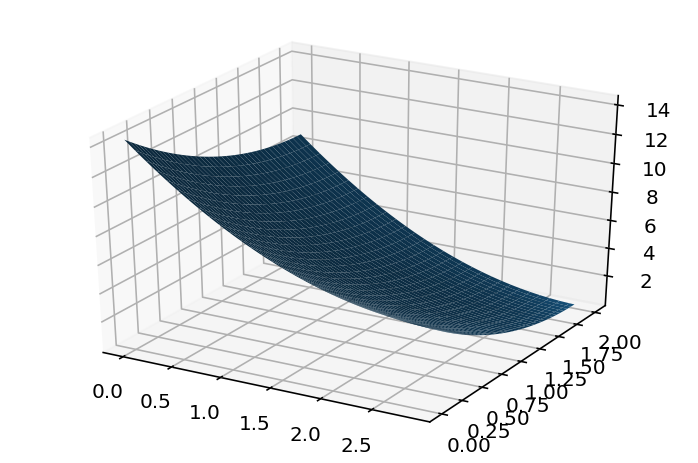

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def computeLinealRegressionError(b0, b1, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (b0 + b1 * x[i])) ** 2
    return totalError / float(len(x))

resultado=fitGradient([1,1], trX, trY, 0.05)
print("[%.2f,%.2f]" %( resultado[0], resultado[1] ) )

#b_0 = np.arange(0, 5, 0.05)
b_0 = np.arange(0, resultado[0], 0.05)

#b_1 = np.arange(0, 5, 0.05)
b_1 = np.arange(0, resultado[1], 0.05)

X, Y = np.meshgrid(b_0, b_1)
    
zs = np.array([computeLinealRegressionError(x, y, trX, trY) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

figure().add_subplot(111, projection = '3d').plot_surface(X, Y, Z)

### Regresión lineal con de scikit-learn
En `scikit-learn` los modelos de regresión lineal se implementa con la clase `LinearRegression`. En el siguiente ejemplo se muestra los pasos necesarios para conseguir una regresión lineal.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
 
# Conjunto de datos
#Horas
x = [[80], [79], [83], [84], [78], [60], [82], [85], [79], [88], [86], [62]]

#Produccion
y = [[300], [302], [315], [330], [300], [250], [310], [340], [315], [350], [370], [240]]

# Creación del modelo
model = LinearRegression()
model.fit(x, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model.predict([[70]]))
#print

# Predicción del modelo
y_train_pred = model.predict(x);
print(model.intercept_)
print(model.coef_)

#print(y_train_pred)

# Obtención de los parametros de ajuste
#w_0:: La constante o intercepto. Matemáticamente sirve para que la linea que ajusta los datos, no tenga obligatoriamente que pasar por el 0 en el eje de abscisas
#Wₙ: son los pesos, la ponderación de cada una de las variables independientes (las "X")
print('w_0', model.intercept_[0])
print('w_1', model.coef_[0][0])

print('R^2 (A)', model.score(x, y))
print('R^2 (B)', r2_score(y, y_train_pred))
print('Error cuadrático medio', mean_squared_error(y_train_pred, y))
print('Error absoluto medio', mean_absolute_error(y_train_pred, y))   #Por cada vez que predicimos la produccion hay un error de 7.51
print('Mediana del error absoluto', median_absolute_error(y_train_pred, y))

Con 70 horas la producción sería: [[275.44756051]]
[0.31502113]
[[3.93046485]]
w_0 0.31502112946606076
w_1 3.9304648482520164
R^2 (A) 0.8753093285402231
R^2 (B) 0.8753093285402231
Error cuadrático medio 159.12261493148907
Error absoluto medio 9.849980791394541
Mediana del error absoluto 7.856511717249333


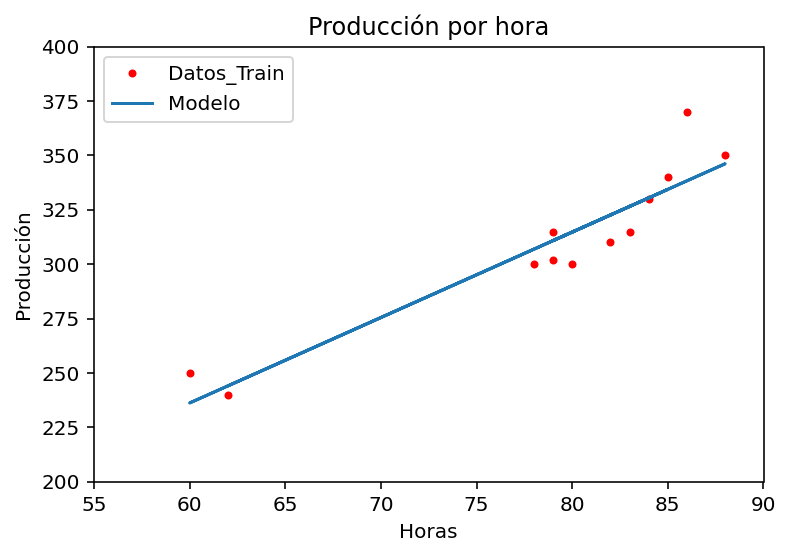

In [ ]:
plot(x, y, 'r.', label = 'Datos_Train')
plot(x, y_train_pred, label = 'Modelo')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
##axis([55, 90, 200, 350])
axis([55, 90, 200, 400])

legend(loc = 2)

Para representar el modelo de forma gráfica se puede utilizar las siguientes lineas de codigo:

Prediccion : [[232.21244718]
 [322.61313869]
 [334.40453323]
 [342.26546293]
 [318.68267384]
 [247.93430657]
 [334.40453323]
 [346.19592778]
 [322.61313869]
 [342.26546293]
 [326.54360353]
 [255.79523627]]
R^2 (A) 0.7891885396245013
R^2 (B) 0.7891885396245013
Error cuadrático medio 678.4489931335571
Error absoluto medio 16.704475605071078
Mediana del error absoluto 11.79139454475603


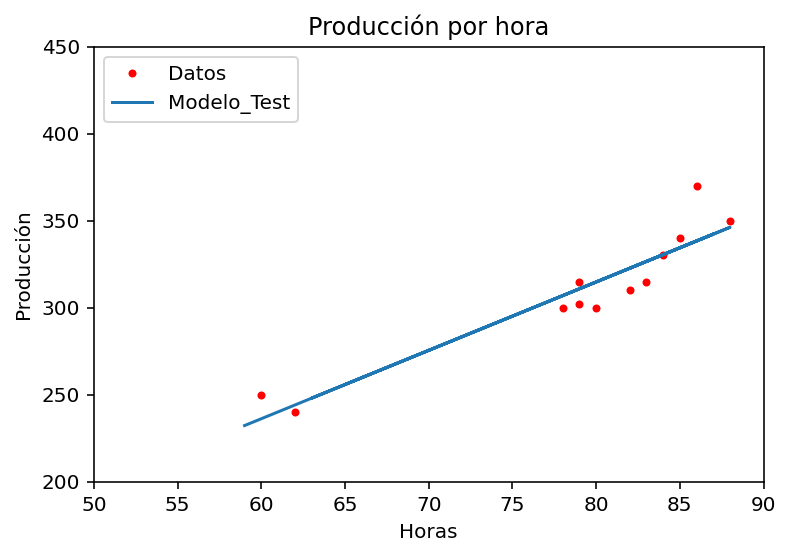

In [ ]:
##Datos Test
x_test = [[59], [82], [85], [87], [81], [63], [85], [88], [82], [87], [83], [65]]
y_test = [[250], [305], [318], [333], [303], [253], [303], [343], [318], [333], [313], [243]]

y_test_pred = model.predict(x_test)
print('Prediccion :', (y_test_pred))

print('R^2 (A)', model.score(x_test, y_test))
print('R^2 (B)', r2_score(y_test, y_test_pred))
print('Error cuadrático medio', mean_squared_error(y_test_pred, y_train_pred))
print('Error absoluto medio', mean_absolute_error(y_test_pred, y_train_pred))   #Por cada vez que predicimos la produccion hay un error de 1.13
print('Mediana del error absoluto', median_absolute_error(y_test_pred, y_train_pred))

plot(x, y, 'r.', label = 'Datos')
plot(x_test, y_test_pred, label = 'Modelo_Test')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
axis([50, 90, 200, 450])

legend(loc = 2)

(12, 4)


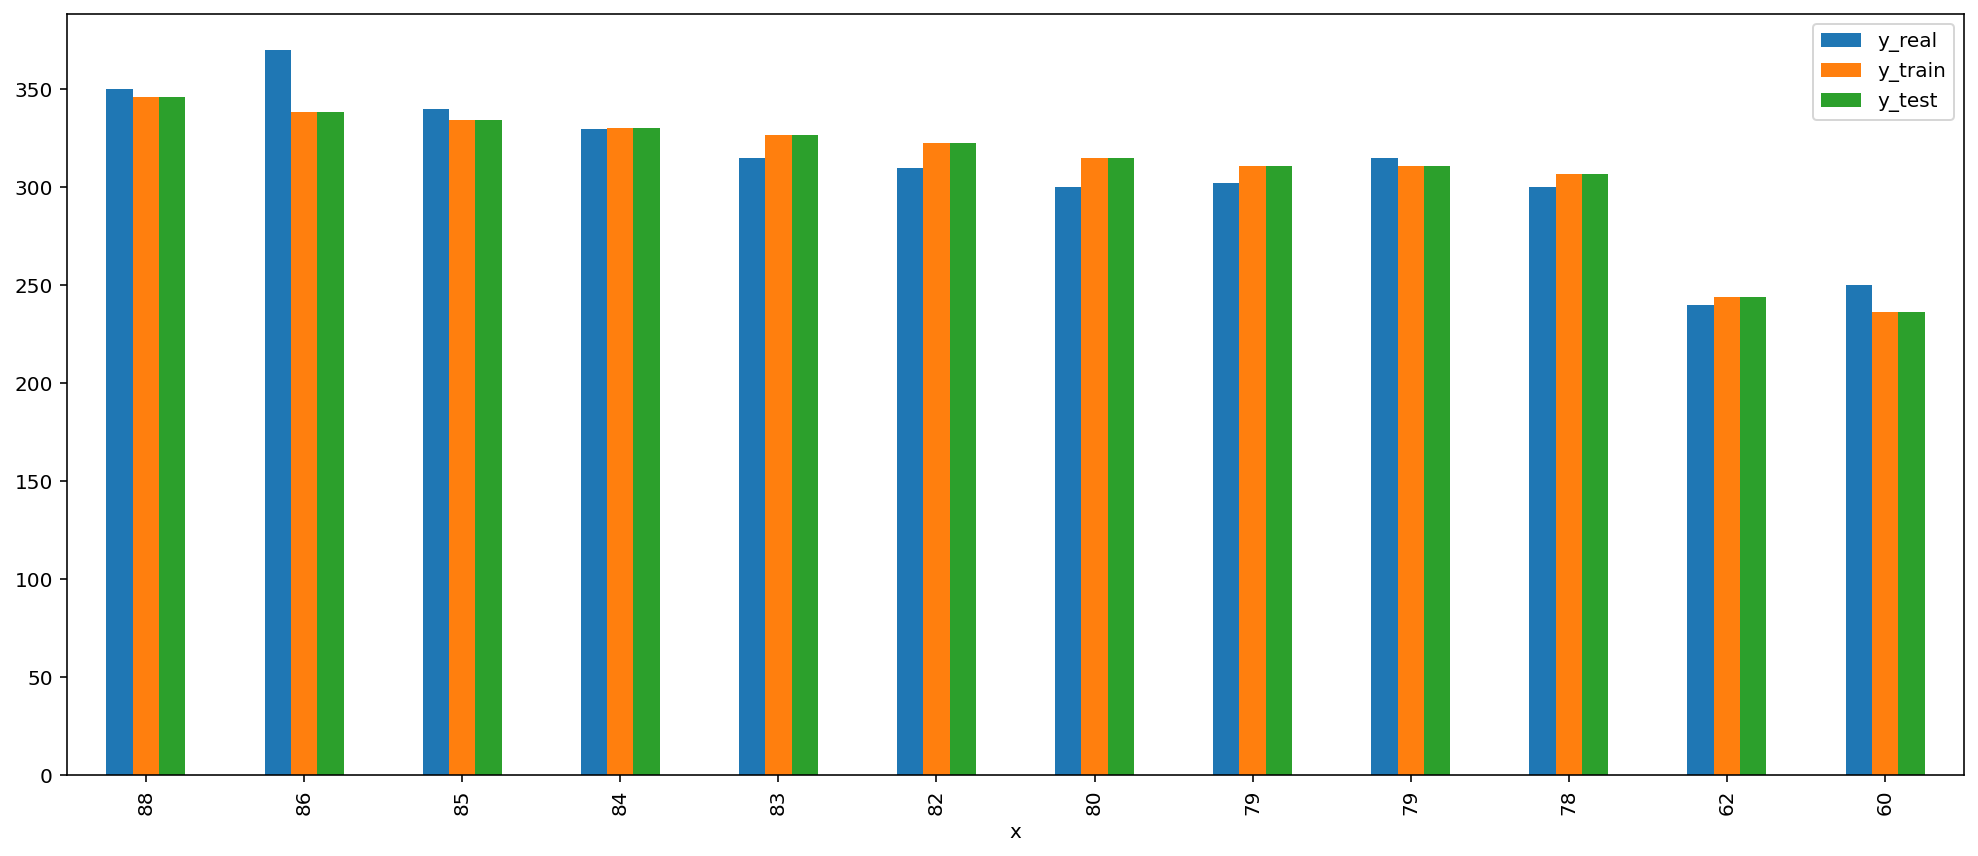

In [ ]:
################################################################################################################
#######################Imprimir Los valores de Prediccion en una misma Grafica##################################
################################################################################################################
#print(type(y_test))  #List
#print(type(y_train_pred)) #numpy.ndarray
#print(type(x)) #list
#print(type(y)) #List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [17, 7]

x_train = x + x_test
#print(type(x_train))
#print(x_train)
df_datos = pd.DataFrame(list(zip(x_train, y, y_train_pred, y_test)),columns =['x', 'y_real', 'y_train', 'y_test'])
df_datos.head()

print(df_datos.shape)

df_datos['x'] = df_datos['x'].astype(str).str[1:-1].astype(int)
df_datos['y_real'] = df_datos['y_real'].astype(str).str[1:-1].astype(int)
df_datos['y_train'] = df_datos['y_train'].astype(str).str[1:-1].astype(float)
df_datos['y_test'] = df_datos['y_test'].astype(str).str[1:-1].astype(int)

#df_datos.head()

df_datos.y_test = df_datos["y_train"].astype(float)
df_datos.sort_values("x", ascending=False, inplace=True)
df_datos.plot.bar(x="x", y=["y_real", "y_train", "y_test"])






Al analizar los resultados de este ajuste se puede observar que el término independiente es mayor que cero. Teniendo en cuenta que el modelo utilizado es de la forma:
$$y=w_0+w_1x$$
 
Esto índica que el modelo implementado no realiza una estimación correcta cuando se trabajan 0 horas, ya que en este caso la producción esperada sería igual al valor del término independiente. La solución de este problema se puede obtener haciendo un modelo en el que no exista término independiente.

In [ ]:
# Modelo sin término de independiente
###fit_intercept: True/False, para quedar o quitar la constante w₀ de nuestro modelo. (si la quitamos la recta pasará obligatoriamente por el punto 0 del eje de abscisas)
model_ni = LinearRegression(fit_intercept = False)
model_ni.fit(x, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model_ni.predict([[70]])[0])

y_train_pred = model_ni.predict(x);
##print(model.intercept_)
##print(model.coef_)

# Obtención de los parametros de ajuste
print('w_0', model_ni.intercept_)
print('w_1', model_ni.coef_[0][0])
##print('R^2', model_ni.score(x, y))

##print('w_0', model.intercept_[0])
##print('w_1', model.coef_[0][0])
print('R^2 (A)', model_ni.score(x, y))
print('R^2 (B)', r2_score(y, y_train_pred))
print('Error cuadrático medio', mean_squared_error(y_train_pred, y))
print('Error absoluto medio', mean_absolute_error(y_train_pred, y))   #Por cada vez que predicimos la produccion hay un error de 7.51
print('Mediana del error absoluto', median_absolute_error(y_train_pred, y))



Con 70 horas la producción sería: [275.40904512]
w_0 0.0
w_1 3.934414930279412
R^2 (A) 0.8753084341858557
R^2 (B) 0.8753084341858557
Error cuadrático medio 159.1237562518779
Error absoluto medio 9.846853295159319
Mediana del error absoluto 7.851572026933837


Una forma de comparar la validez de los dos modelos es mediante la representación grafica de las predicciones de ambos y los datos en una misma figura.

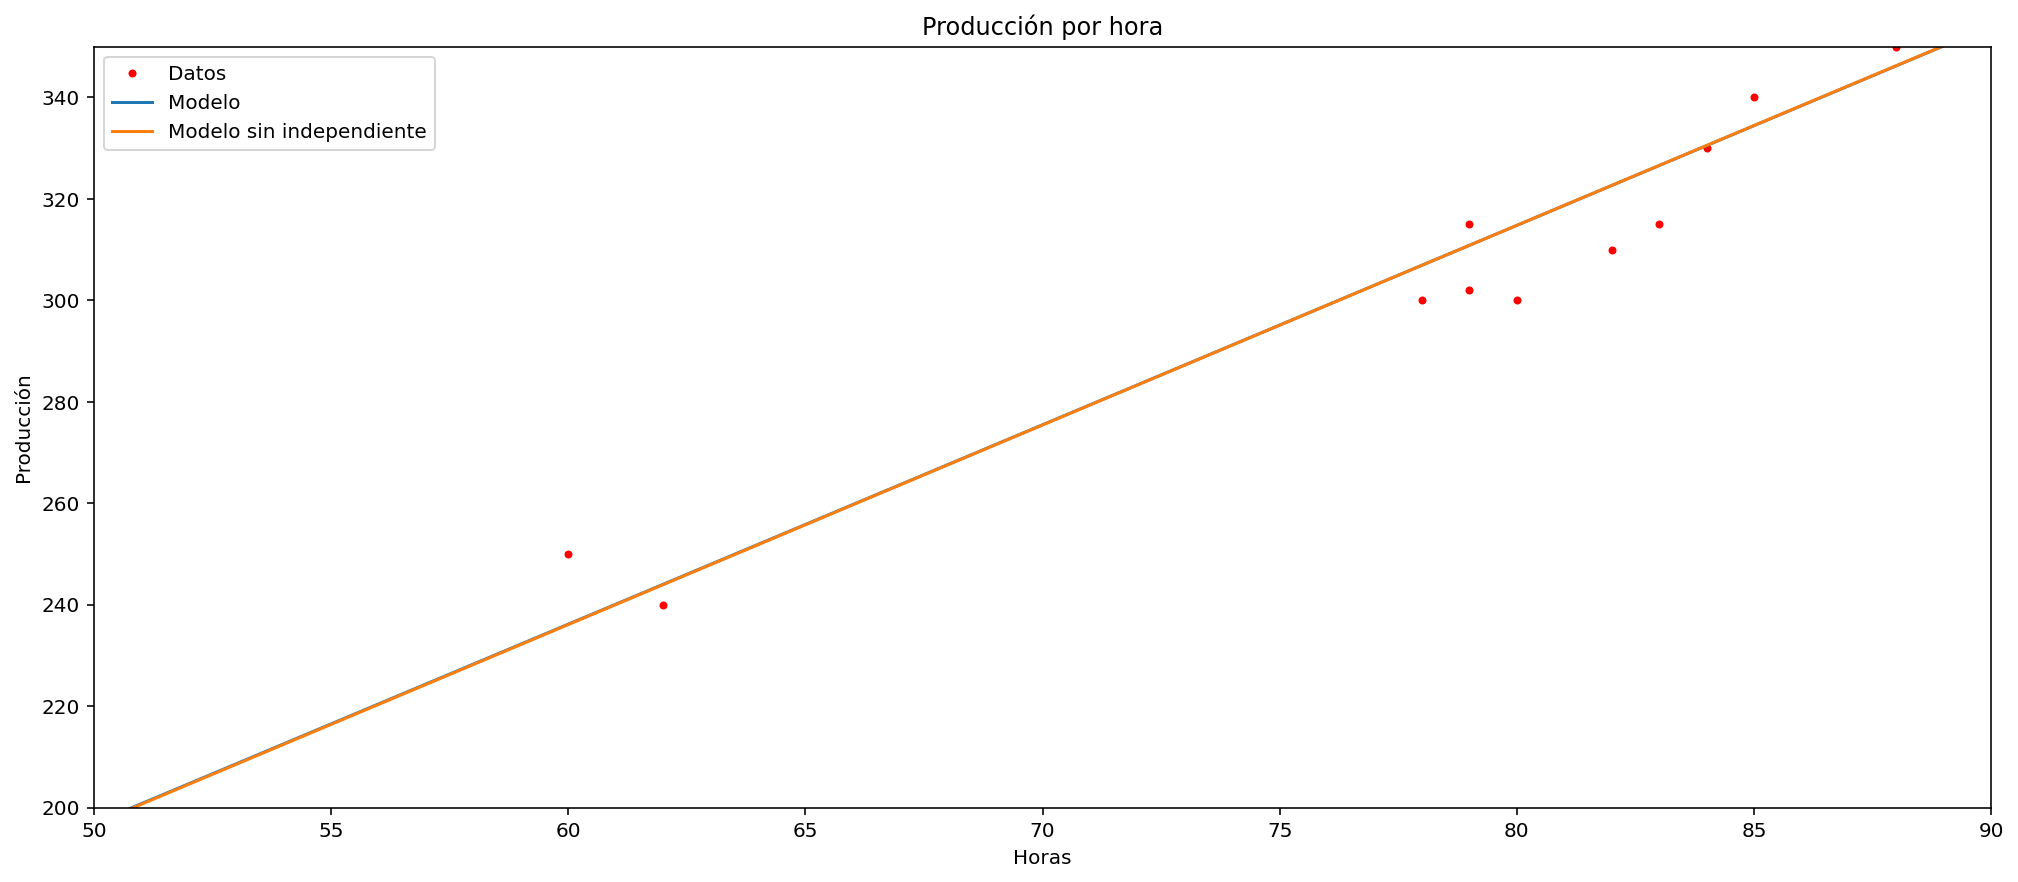

In [ ]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')
plot(x_p, model_ni.predict(x_p), label = 'Modelo sin independiente')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
axis([50, 90, 200, 350])

legend(loc = 2)

In [ ]:
#plot(x, y, 'r.', label = 'Datos')
#plot(x, y_train_pred, label = 'Modelo_Train')
#plot(x_test, y_test_pred, label = 'Modelo_Test')
#plot(x_p, model_ni.predict(x_p), label = 'Modelo sin independiente')

#title(u'Producción por hora')
#xlabel('Horas')
#ylabel(u'Producción')
#axis([50, 90, 200, 350])

#legend(loc = 2)

### Regresión lineal múltiple

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 5, include_bias = False)
x_2     = poly_2.fit_transform(x)

model_2 = LinearRegression(fit_intercept = False)
model_2.fit(x_2, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model_2.predict( poly_2.fit_transform([[70]]) )[0])


# Obtención de los parametros de ajuste
print('w_1', model_2.coef_[0][0])
print('w_2', model_2.coef_[0][1])
#print('R^2', model_2.score(x_2, y))


y_train_pred = model_2.predict(x_2);
print('R^2 (A)', model_2.score(x_2, y))
print('R^2 (B)', r2_score(y, y_train_pred))
print('Error cuadrático medio', mean_squared_error(y_train_pred, y))
print('Error absoluto medio', mean_absolute_error(y_train_pred, y))   #Por cada vez que predicimos la produccion hay un error de 7.51
print('Mediana del error absoluto', median_absolute_error(y_train_pred, y))


Con 70 horas la producción sería: [256.01782297]
w_1 217.16387946403492
w_2 -10.865752511786134
R^2 (A) 0.9228923850419724
R^2 (B) 0.9228923850419724
Error cuadrático medio 98.40002607740962
Error absoluto medio 7.356470700853454
Mediana del error absoluto 5.728269175002424


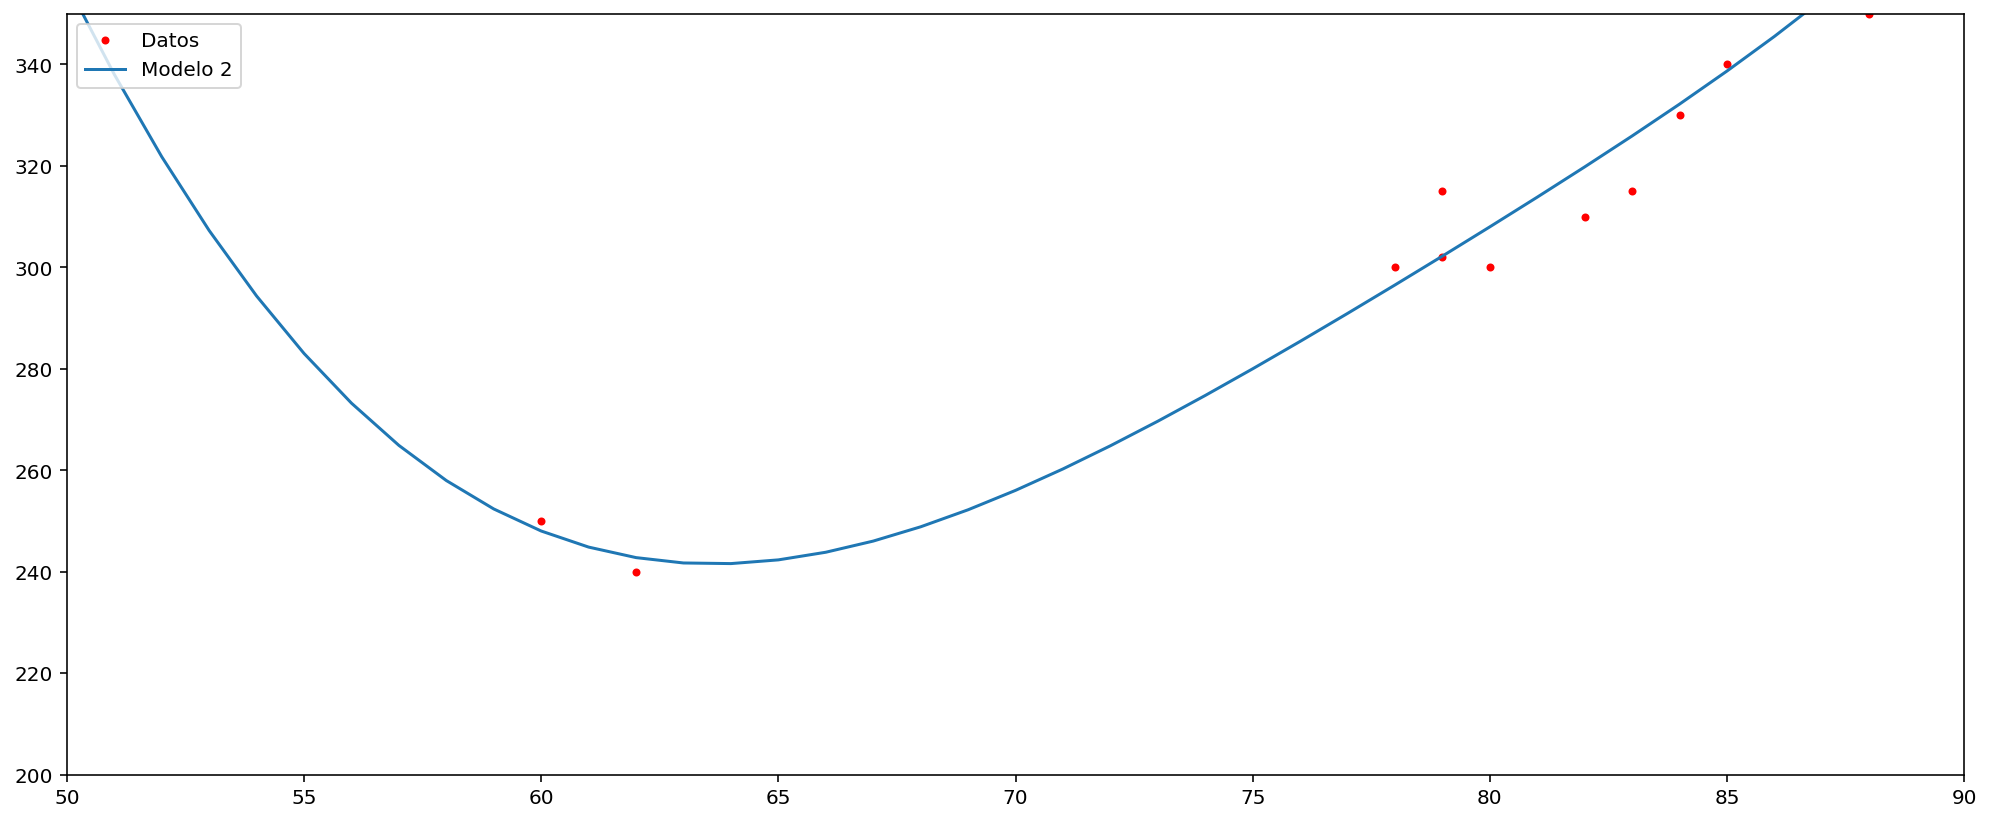

In [ ]:
x_p = [[i] for i in range(50, 91)]
y_2 = model_2.predict(poly_2.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_2, label = 'Modelo 2')
axis([50, 90, 200, 350])
legend(loc = 2)

Las predicciones del modelo basado en un polinomio de grado dos parecen mejores que los resultados obtenidos con el modelo lineal. Se puede repetir el ejercicio con un polinomio de grado 5.

In [ ]:
# Polinomio de grado 5
poly_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = False)
model_5.fit(x_5, y)

print("Modelo 1 - R^2:", model_ni.score(x, y))
print("Modelo 2 - R^2:", model_2.score(x_2, y))
print("Modelo 5 - R^2:", model_5.score(x_5, y))

Modelo 1 - R^2: 0.8753084341858557
Modelo 2 - R^2: 0.9228923850419724
Modelo 5 - R^2: 0.9228923850419724


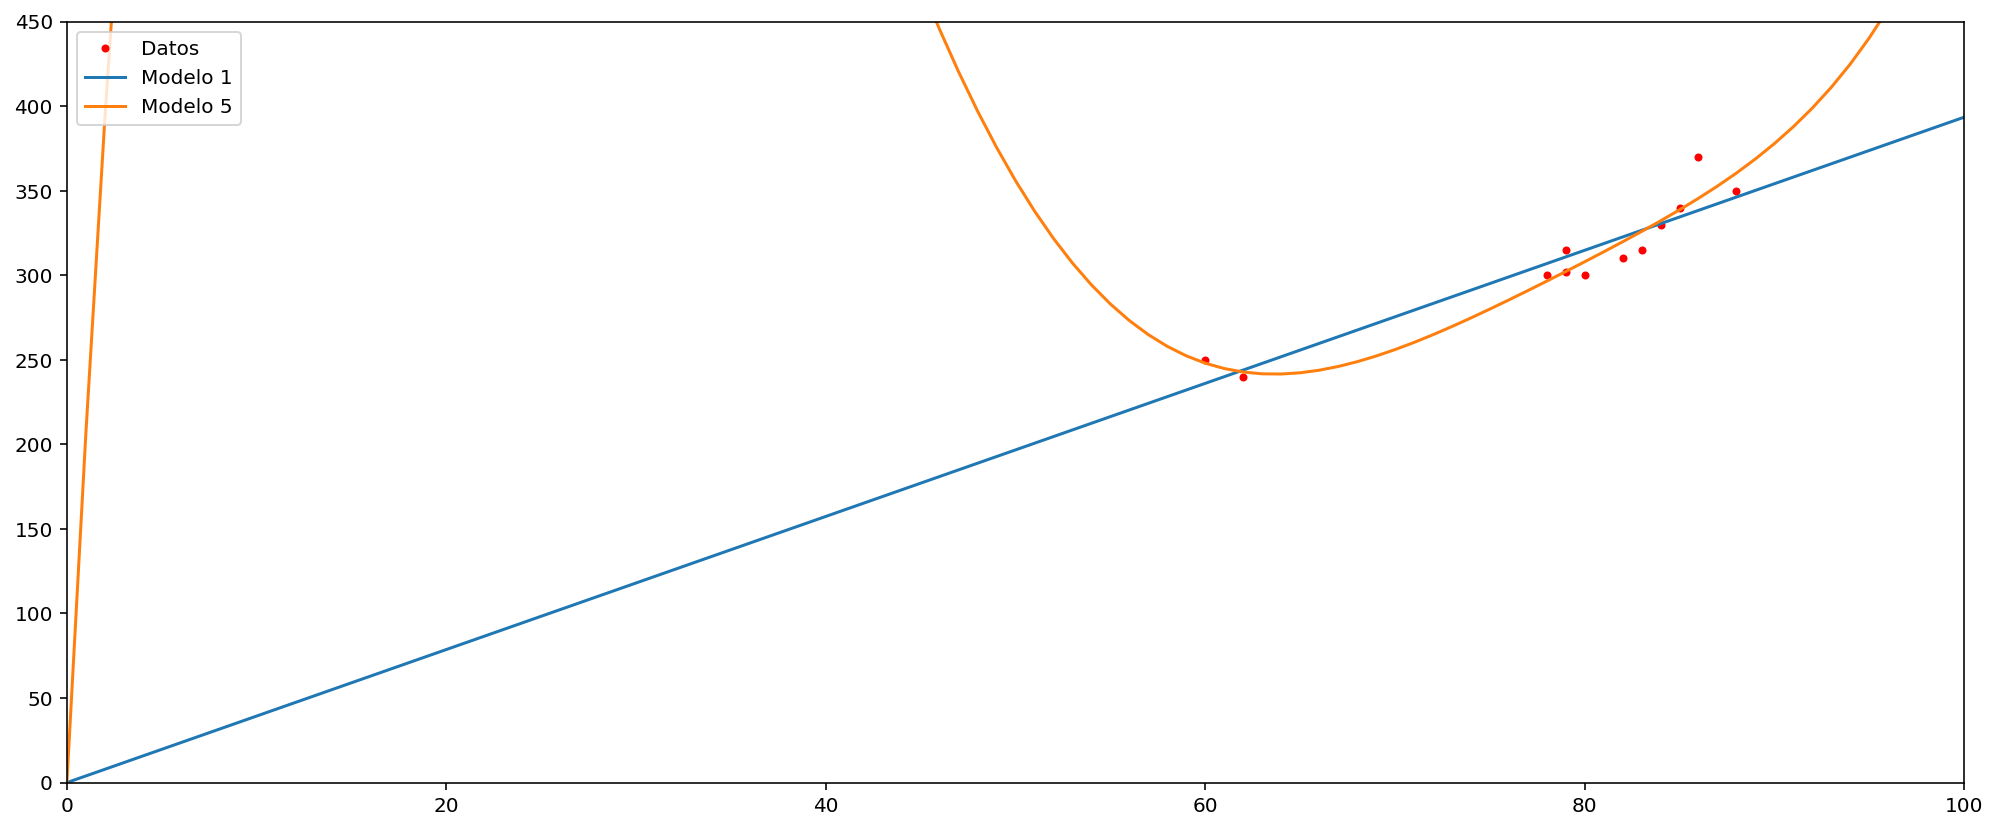

In [ ]:
plt.rcParams['figure.figsize'] = [17, 7]

x_p = [[i] for i in range(0, 101)]
y_1 = model_ni.predict(x_p)
y_5 = model_5.predict(poly_5.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_1, label = 'Modelo 1')
plot(x_p, y_5, label = 'Modelo 5')

axis([0, 100, 0, 450])
legend(loc = 2)


### Validación cruzada

In [ ]:
from sklearn.datasets import load_boston

# Importación de los datos de vienda de Boston
boston = load_boston()

# Creación de un modelo 
model_boston = LinearRegression()
model_boston.fit(boston.data, boston.target)

print("R^2:", model_boston.score(boston.data, boston.target))

R^2: 0.7406426641094095


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target)

# Creación de un modelo
model = LinearRegression()
model.fit(x_train, y_train)

predit_train = model.predict(x_train)
predit_test = model.predict(x_test)

# Evaluación de R2
print('R2 en entrenamiento es: ', model.score(x_train, y_train))
print('R2 en validación es: ', model.score(x_test, y_test))

R2 en entrenamiento es:  0.7477997368860426
R2 en validación es:  0.6979450346481959


### Variables Categóricas

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
import pandas as pd

# Conjunto de datos con las factorias
x = [[80, 'Factoria 1'], [79, 'Factoria 2'], [83, 'Factoria 3'],
     [84, 'Factoria 1'], [78, 'Factoria 2'], [60, 'Factoria 3'],
     [82, 'Factoria 1'], [85, 'Factoria 2'], [79, 'Factoria 3'],
     [84, 'Factoria 1'], [80, 'Factoria 2'], [62, 'Factoria 3']]
y = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Conversion de las datos a DataFrame
x_0 = pd.DataFrame(x, columns = ['Horas', 'Factoria'])
y = pd.DataFrame(y)

# Creación de variables dummies
x = pd.concat([x_0['Horas'], pd.get_dummies(x_0['Factoria'])], axis = 1)

# Polinomio de grado 5
model_dummies = LinearRegression(fit_intercept = False)
model_dummies.fit(x, y)

print("Modelo dummies - R^2:", model_dummies.score(x, y))

Modelo dummies - R^2: 0.9184119128825878


La variables antes de trasnfroamr es

In [ ]:
x_0

,Horas,Factoria
0,80,Factoria 1
1,79,Factoria 2
2,83,Factoria 3
3,84,Factoria 1
4,78,Factoria 2
5,60,Factoria 3
6,82,Factoria 1
7,85,Factoria 2
8,79,Factoria 3
9,84,Factoria 1


Ahora se pude ver la forma de las variables después de transformarlas

In [ ]:
x

,Horas,Factoria 1,Factoria 2,Factoria 3
0,80,1,0,0
1,79,0,1,0
2,83,0,0,1
3,84,1,0,0
4,78,0,1,0
5,60,0,0,1
6,82,1,0,0
7,85,0,1,0
8,79,0,0,1
9,84,1,0,0


## CLASIFICACIÓN MEDIANTE REGRESIÓN LOGÍSTICA
### Regresión logística con scikit-learn

In [ ]:
#!pip install scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


# Creción de un conjunto de entrenamiento aleatorio
X, y = make_classification(n_samples    = 2500    #registros
                           , n_features   = 3     #variables_independientes
                           , n_redundant  = 0     #Para que los valores de las caracteristicas no se repitan
                           , random_state = 1     #Se fija una semilla para que cada vez que se ejecuta no cambian los datos
                           )


# Creación de un conjunto de entrenamietno y test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print("x_train %s :: y_train %s :: x_test %s :: y_test %s" %( str(x_train.shape), str(y_train.shape), str(x_test.shape), str(y_test.shape) ) )

# Ajuste del modelo logístico
classifier   = LogisticRegression().fit(x_train, y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred  = classifier.predict(x_test)

# Obtención de matriz de confusión
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print('La matriz de confusión para entrenamiento es')
print(confusion_matrix_train)
print('La matriz de confusión para test es')
print(confusion_matrix_test)



x_train (1875, 3) :: y_train (1875,) :: x_test (625, 3) :: y_test (625,)
La matriz de confusión para entrenamiento es
[[862  90]
 [ 97 826]]
La matriz de confusión para test es
[[268  35]
 [ 28 294]]


In [ ]:
print('La matriz de confusión para entrenamiento normalizada es')
print(confusion_matrix_train / double(sum(confusion_matrix_train)))
print('La matriz de confusión para test normalizada es')
print(confusion_matrix_test / double(sum(confusion_matrix_test)))

La matriz de confusión para entrenamiento normalizada es
[[0.45973333 0.048     ]
 [0.05173333 0.44053333]]
La matriz de confusión para test normalizada es
[[0.4288 0.056 ]
 [0.0448 0.4704]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Resultados en el conjunto de entrenamiento')
print(' Precisión:', accuracy_score(y_train, y_train_pred))
print(' Exactitud:', precision_score(y_train, y_train_pred))
print(' Exhaustividad:', recall_score(y_train, y_train_pred))
print('')
print(' Resultados en el conjunto de test')
print(' Precisión:', accuracy_score(y_test, y_test_pred))
print(' Exactitud:', precision_score(y_test, y_test_pred))
print(' Exhaustividad:', recall_score(y_test, y_test_pred))

Resultados en el conjunto de entrenamiento
 Precisión: 0.9002666666666667
 Exactitud: 0.9017467248908297
 Exhaustividad: 0.894907908992416

 Resultados en el conjunto de test
 Precisión: 0.8992
 Exactitud: 0.8936170212765957
 Exhaustividad: 0.9130434782608695


AUC: 0.8987659635528771


Text(0.5, 1.0, 'AUC = 0.90')

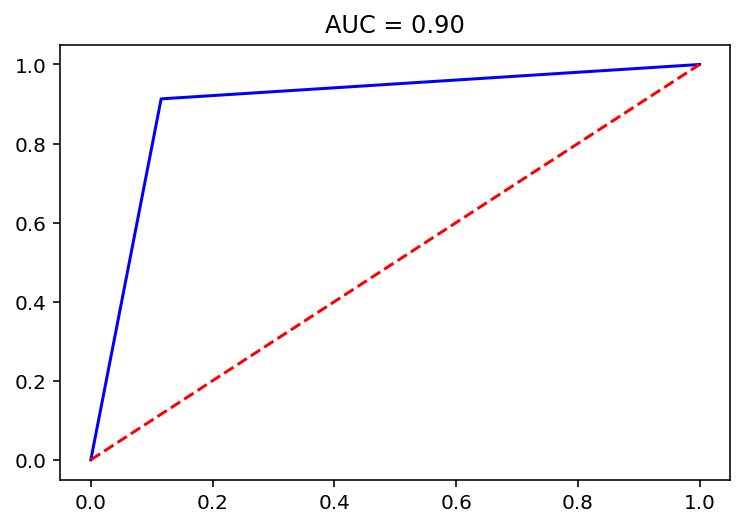

In [ ]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [ ]:
prob = classifier.predict_proba(x_test)

y_th = np.ones(len(y_test), dtype=bool)

for th in (0.7, 0.3):
    for i in range(len(y_test)):
        y_th[i] = prob[i][1] > th

    print('Precisión ', th, ':', accuracy_score(y_test, y_th))
    print('Exactitud ', th, ':', precision_score(y_test, y_th))
    print('Exhaustividad ', th, ':', recall_score(y_test, y_th))

    print("\n")

    print

Precisión  0.7 : 0.9072
Exactitud  0.7 : 0.9489795918367347
Exhaustividad  0.7 : 0.8664596273291926


Precisión  0.3 : 0.88
Exactitud  0.3 : 0.8293333333333334
Exhaustividad  0.3 : 0.9658385093167702




## ARBOLES DE DECISIÓN

# Ejemplo 1 Arboles Desición

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


# Creción de un conjunto de entrenamiento aleatorio
X, y = make_classification(n_samples    = 2500    #registros
                           , n_features   = 3     #variables_independientes
                           , n_redundant  = 0     #Para que los valores de las caracteristicas no se repitan
                           , random_state = 1     #Se fija una semilla para que cada vez que se ejecuta no cambian los datos
                           )


# Creación de un conjunto de entrenamietno y test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print("x_train %s :: y_train %s :: x_test %s :: y_test %s" %( str(x_train.shape), str(y_train.shape), str(x_test.shape), str(y_test.shape) ) )

x_train (1875, 3) :: y_train (1875,) :: x_test (625, 3) :: y_test (625,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#El dataset es el que usamos en la regresion logistica "make_classification"

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=3).fit(x_train, y_train)
y_pred        = dt_classifier.predict(x_train)
print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

print('\n')

y_pred_test     = dt_classifier.predict(x_test)

print('Precisión Test:', accuracy_score(y_test, y_pred_test))
print('Exactitud Test:', precision_score(y_test, y_pred_test))
print('Exhaustividad Test:', recall_score(y_test, y_pred_test))




Precisión: 0.904
Exactitud: 0.8596321393998064
Exhaustividad: 0.962080173347779


Precisión Test: 0.8912
Exactitud Test: 0.8432432432432433
Exhaustividad Test: 0.968944099378882


In [ ]:
text_representation = tree.export_text(dt_classifier)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_1 <= 0.16
|   |--- feature_1 <= -0.54
|   |   |--- feature_2 <= -0.04
|   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.04
|   |   |   |--- class: 0
|   |--- feature_1 >  -0.54
|   |   |--- feature_2 <= 0.42
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.42
|   |   |   |--- class: 0
|--- feature_1 >  0.16
|   |--- feature_1 <= 1.36
|   |   |--- feature_2 <= 1.30
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.30
|   |   |   |--- class: 0
|   |--- feature_1 >  1.36
|   |   |--- class: 1



In [ ]:
x_train

array([[ 0.21676781, -0.8558495 ,  0.49327176],
       [ 1.61903824,  2.30396807,  1.91088564],
       [ 0.03652281, -2.30148373, -0.24953974],
       ...,
       [-0.37200522,  0.5031433 ,  0.70891576],
       [ 0.4665654 ,  1.63502456, -0.51188226],
       [ 1.25089075,  0.96627704,  0.98026888]])

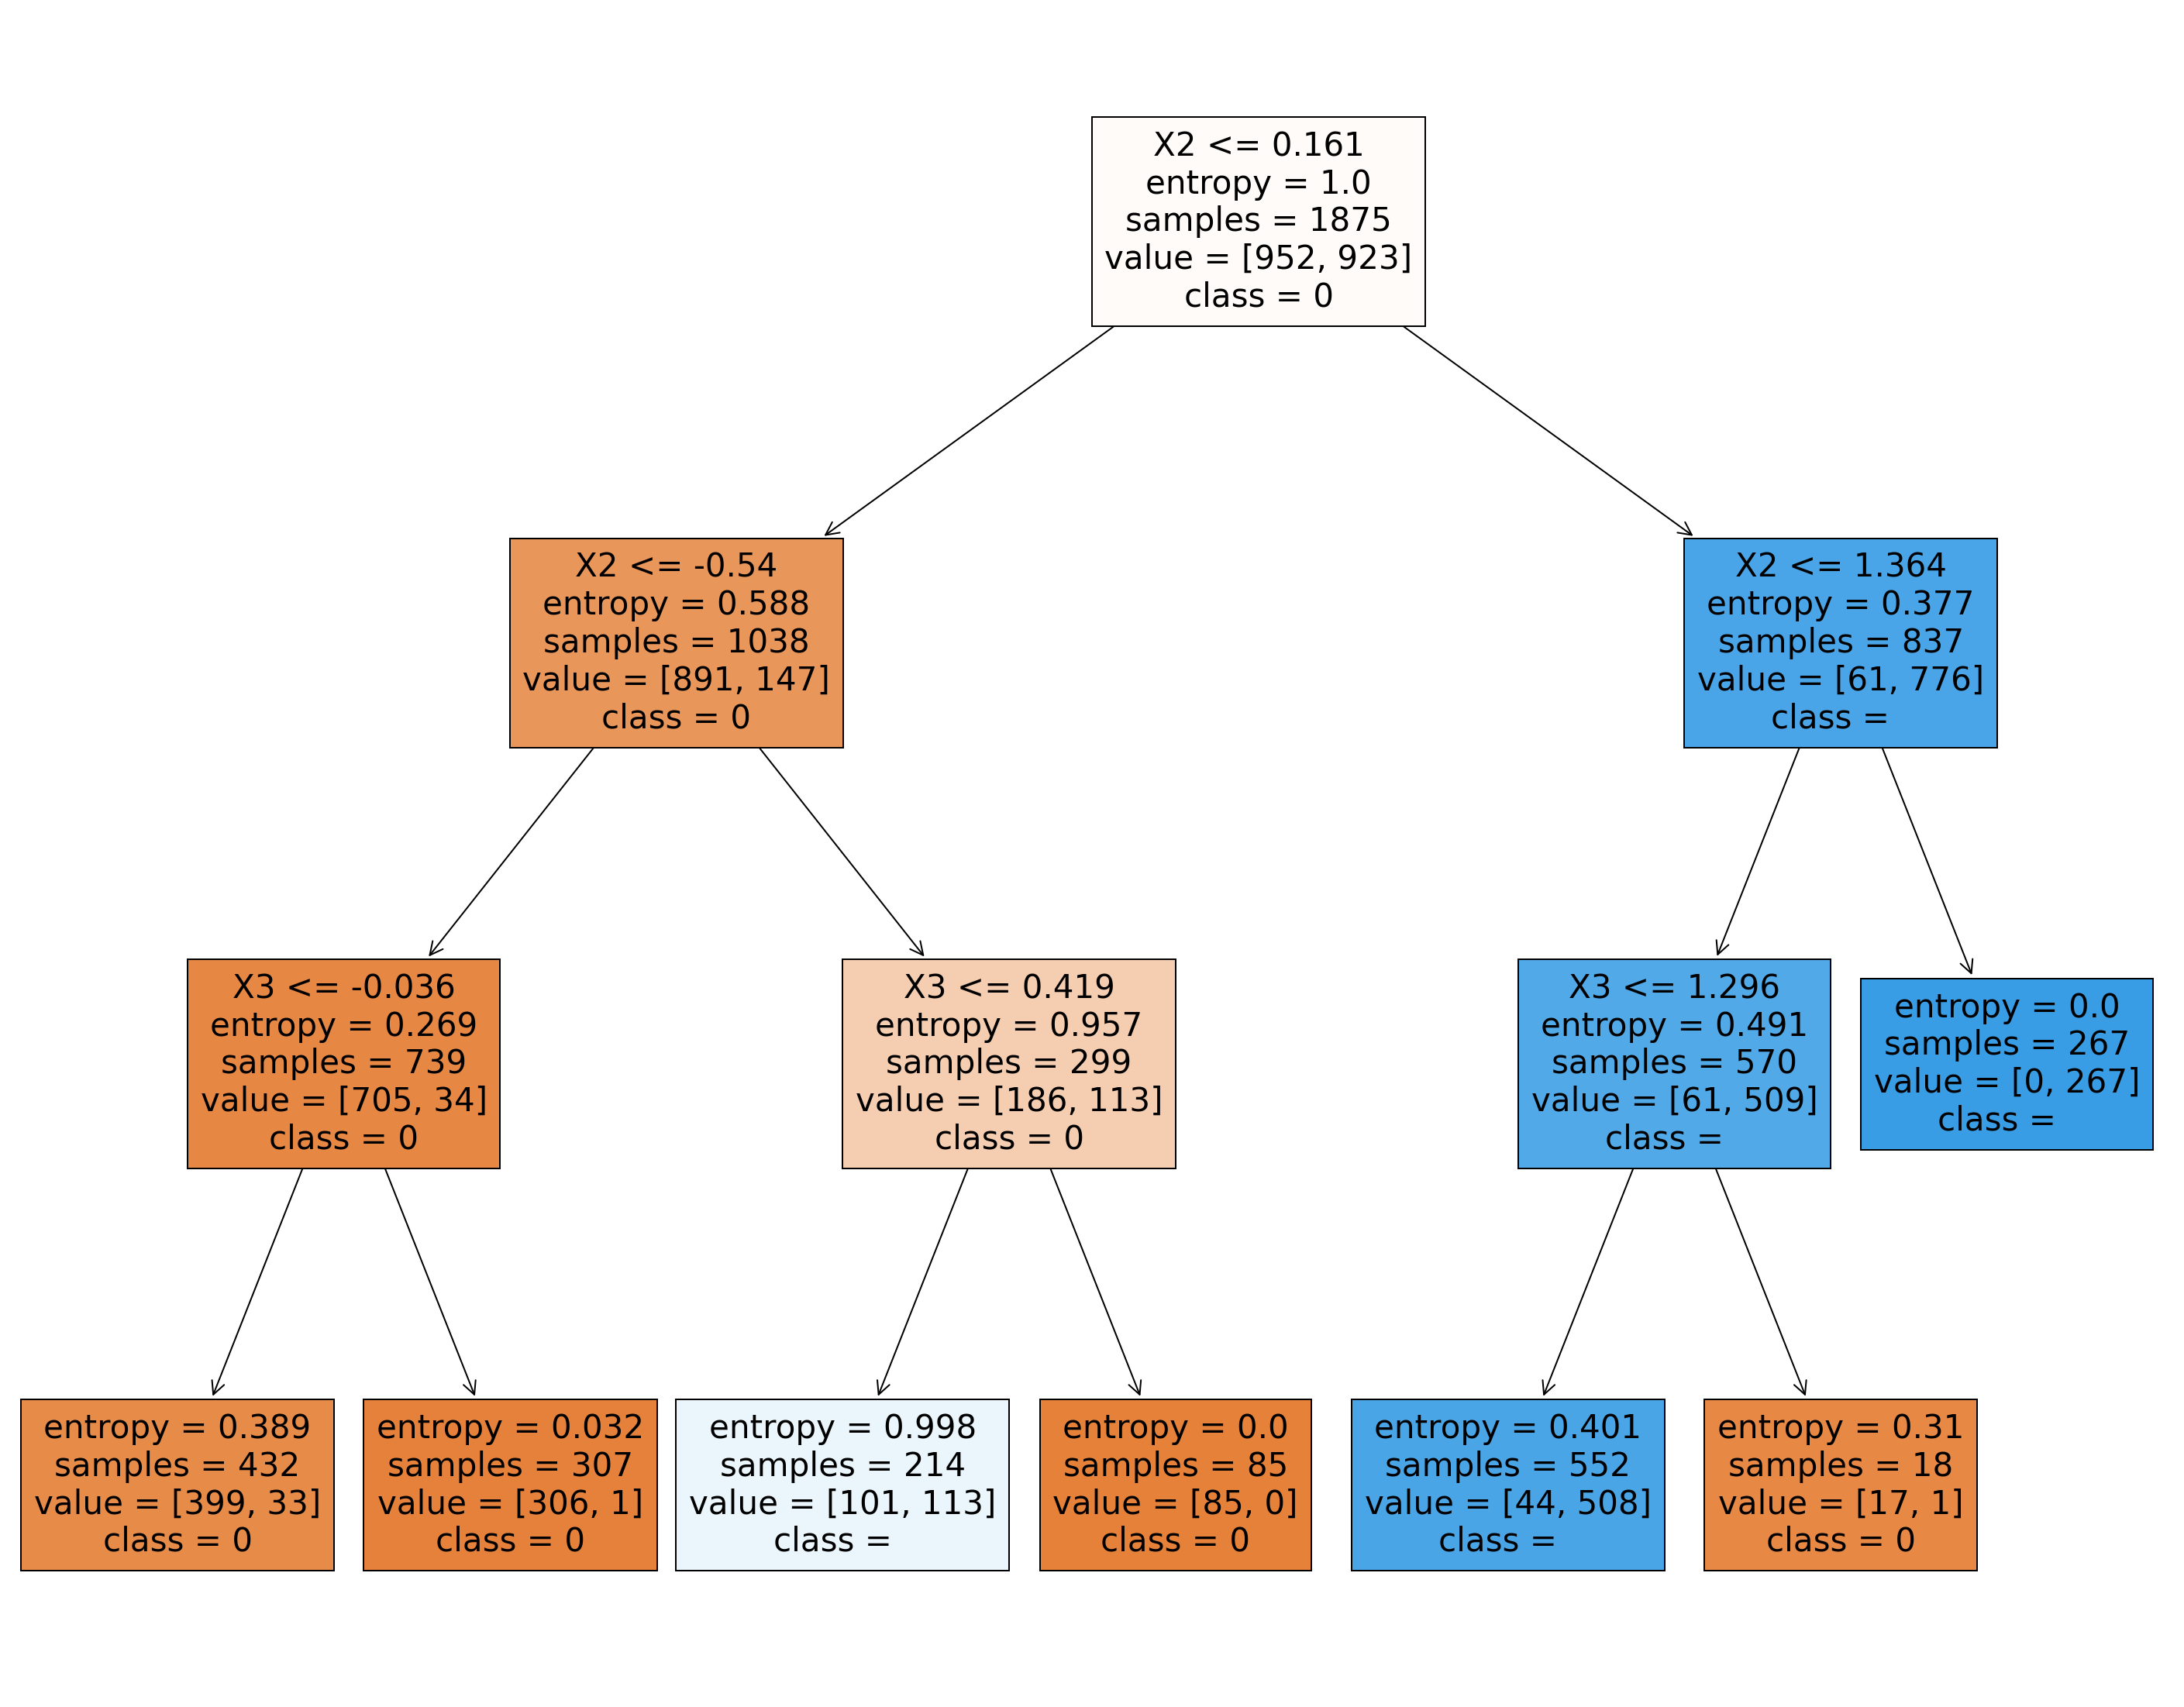

In [ ]:
import pandas as pd

plt.rcParams['figure.figsize'] = [17, 7]


dataset = pd.DataFrame(X)
# give custom names to the features
dataset.columns = ['X1', 'X2', 'X3']
# Now add the label as a column
dataset['y'] = y


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=dataset.columns,  
                   class_names=str(dataset['y']),
                   filled=True)



In [ ]:
!pip install graphviz
!pip install pydotplus



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3


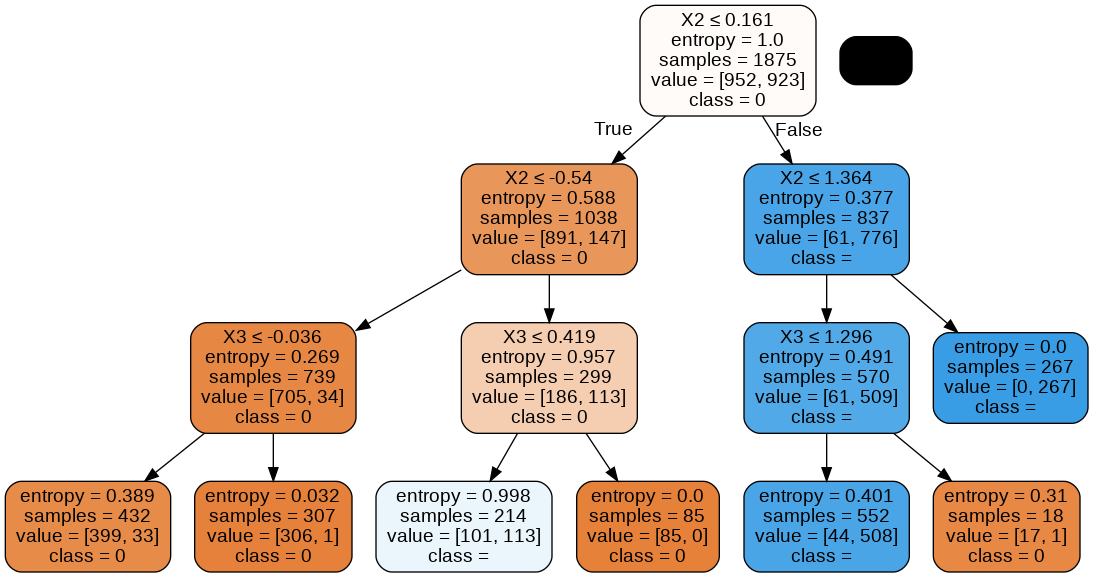

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import pandas as pd

plt.rcParams['figure.figsize'] = [17, 7]

#print(X)
print(dt_classifier.n_features_in_)
dataset = pd.DataFrame(X)
# give custom names to the features
dataset.columns = ['X1', 'X2', 'X3']
# Now add the label as a column
dataset['y'] = y

#print(dataset.columns)
#print(dataset['y'])

dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True
                , feature_names = ['X1', 'X2', 'X3']
                , class_names=str(dataset['y'])
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('imange_DecisionTreeClassifier.png')
Image(graph.create_png())

# Ejemplo 2 Arboles Desición

In [ ]:
#################################################################################################################
################################################ CLIMA ##########################################################
#################################################################################################################

In [ ]:
df_dt_clima = pd.read_csv("csv_clima.csv", sep=",")

df_dt_clima.head()


,Pronostico,Temperatura,Humedad,Ventoso,Jugar
0,soleado,85,85,FALSO,NO
1,soleado,80,90,VERDADERO,NO
2,nublado,83,86,FALSO,SI
3,lluvioso,70,96,FALSO,SI
4,lluvioso,68,80,FALSO,SI


In [ ]:
from sklearn import preprocessing
def convert(data, tipo):
    number = preprocessing.LabelEncoder()
    if tipo==1:
      data['Pronostico'] = number.fit_transform(data.Pronostico)
      data['Temperatura'] = number.fit_transform(data.Temperatura)
      data['Humedad'] = number.fit_transform(data.Humedad)
      data['Ventoso'] = number.fit_transform(data.Ventoso)
    if tipo == 2:
          data['Jugar'] = number.fit_transform(data.Jugar)
###    data=data.fillna(-999)
    return data



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
pd.options.mode.chained_assignment = None 
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

x_train_0 = df_dt_clima[['Pronostico','Temperatura','Humedad','Ventoso']]
#print(x_train_0)

y_train_0 = df_dt_clima[['Jugar']]
#print(y_train_0)




In [ ]:
dt_clima_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=3)
x_train=convert(x_train_0, 1)
#print(x_train)
y_train=convert(y_train_0, 2)
#print(y_train)

dt_clima_classifier = dt_clima_classifier.fit(x_train, y_train)


In [ ]:
y_pred        = dt_clima_classifier.predict(x_train)
print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

print('\n')

##Por poca Data
#y_pred_test     = dt_clima_classifier.predict(x_test)
#print('Precisión Test:', accuracy_score(y_test, y_pred_test))
#print('Exactitud Test:', precision_score(y_test, y_pred_test))
#print('Exhaustividad Test:', recall_score(y_test, y_pred_test))


Precisión: 0.9333333333333333
Exactitud: 1.0
Exhaustividad: 0.8888888888888888




In [ ]:
text_representation = tree.export_text(dt_clima_classifier)
print(text_representation)

with open("ds_clima_decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_2 <= 3.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  1.50
|   |   |--- class: 1
|--- feature_2 >  3.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_1 <= 5.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  5.50
|   |   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- class: 0



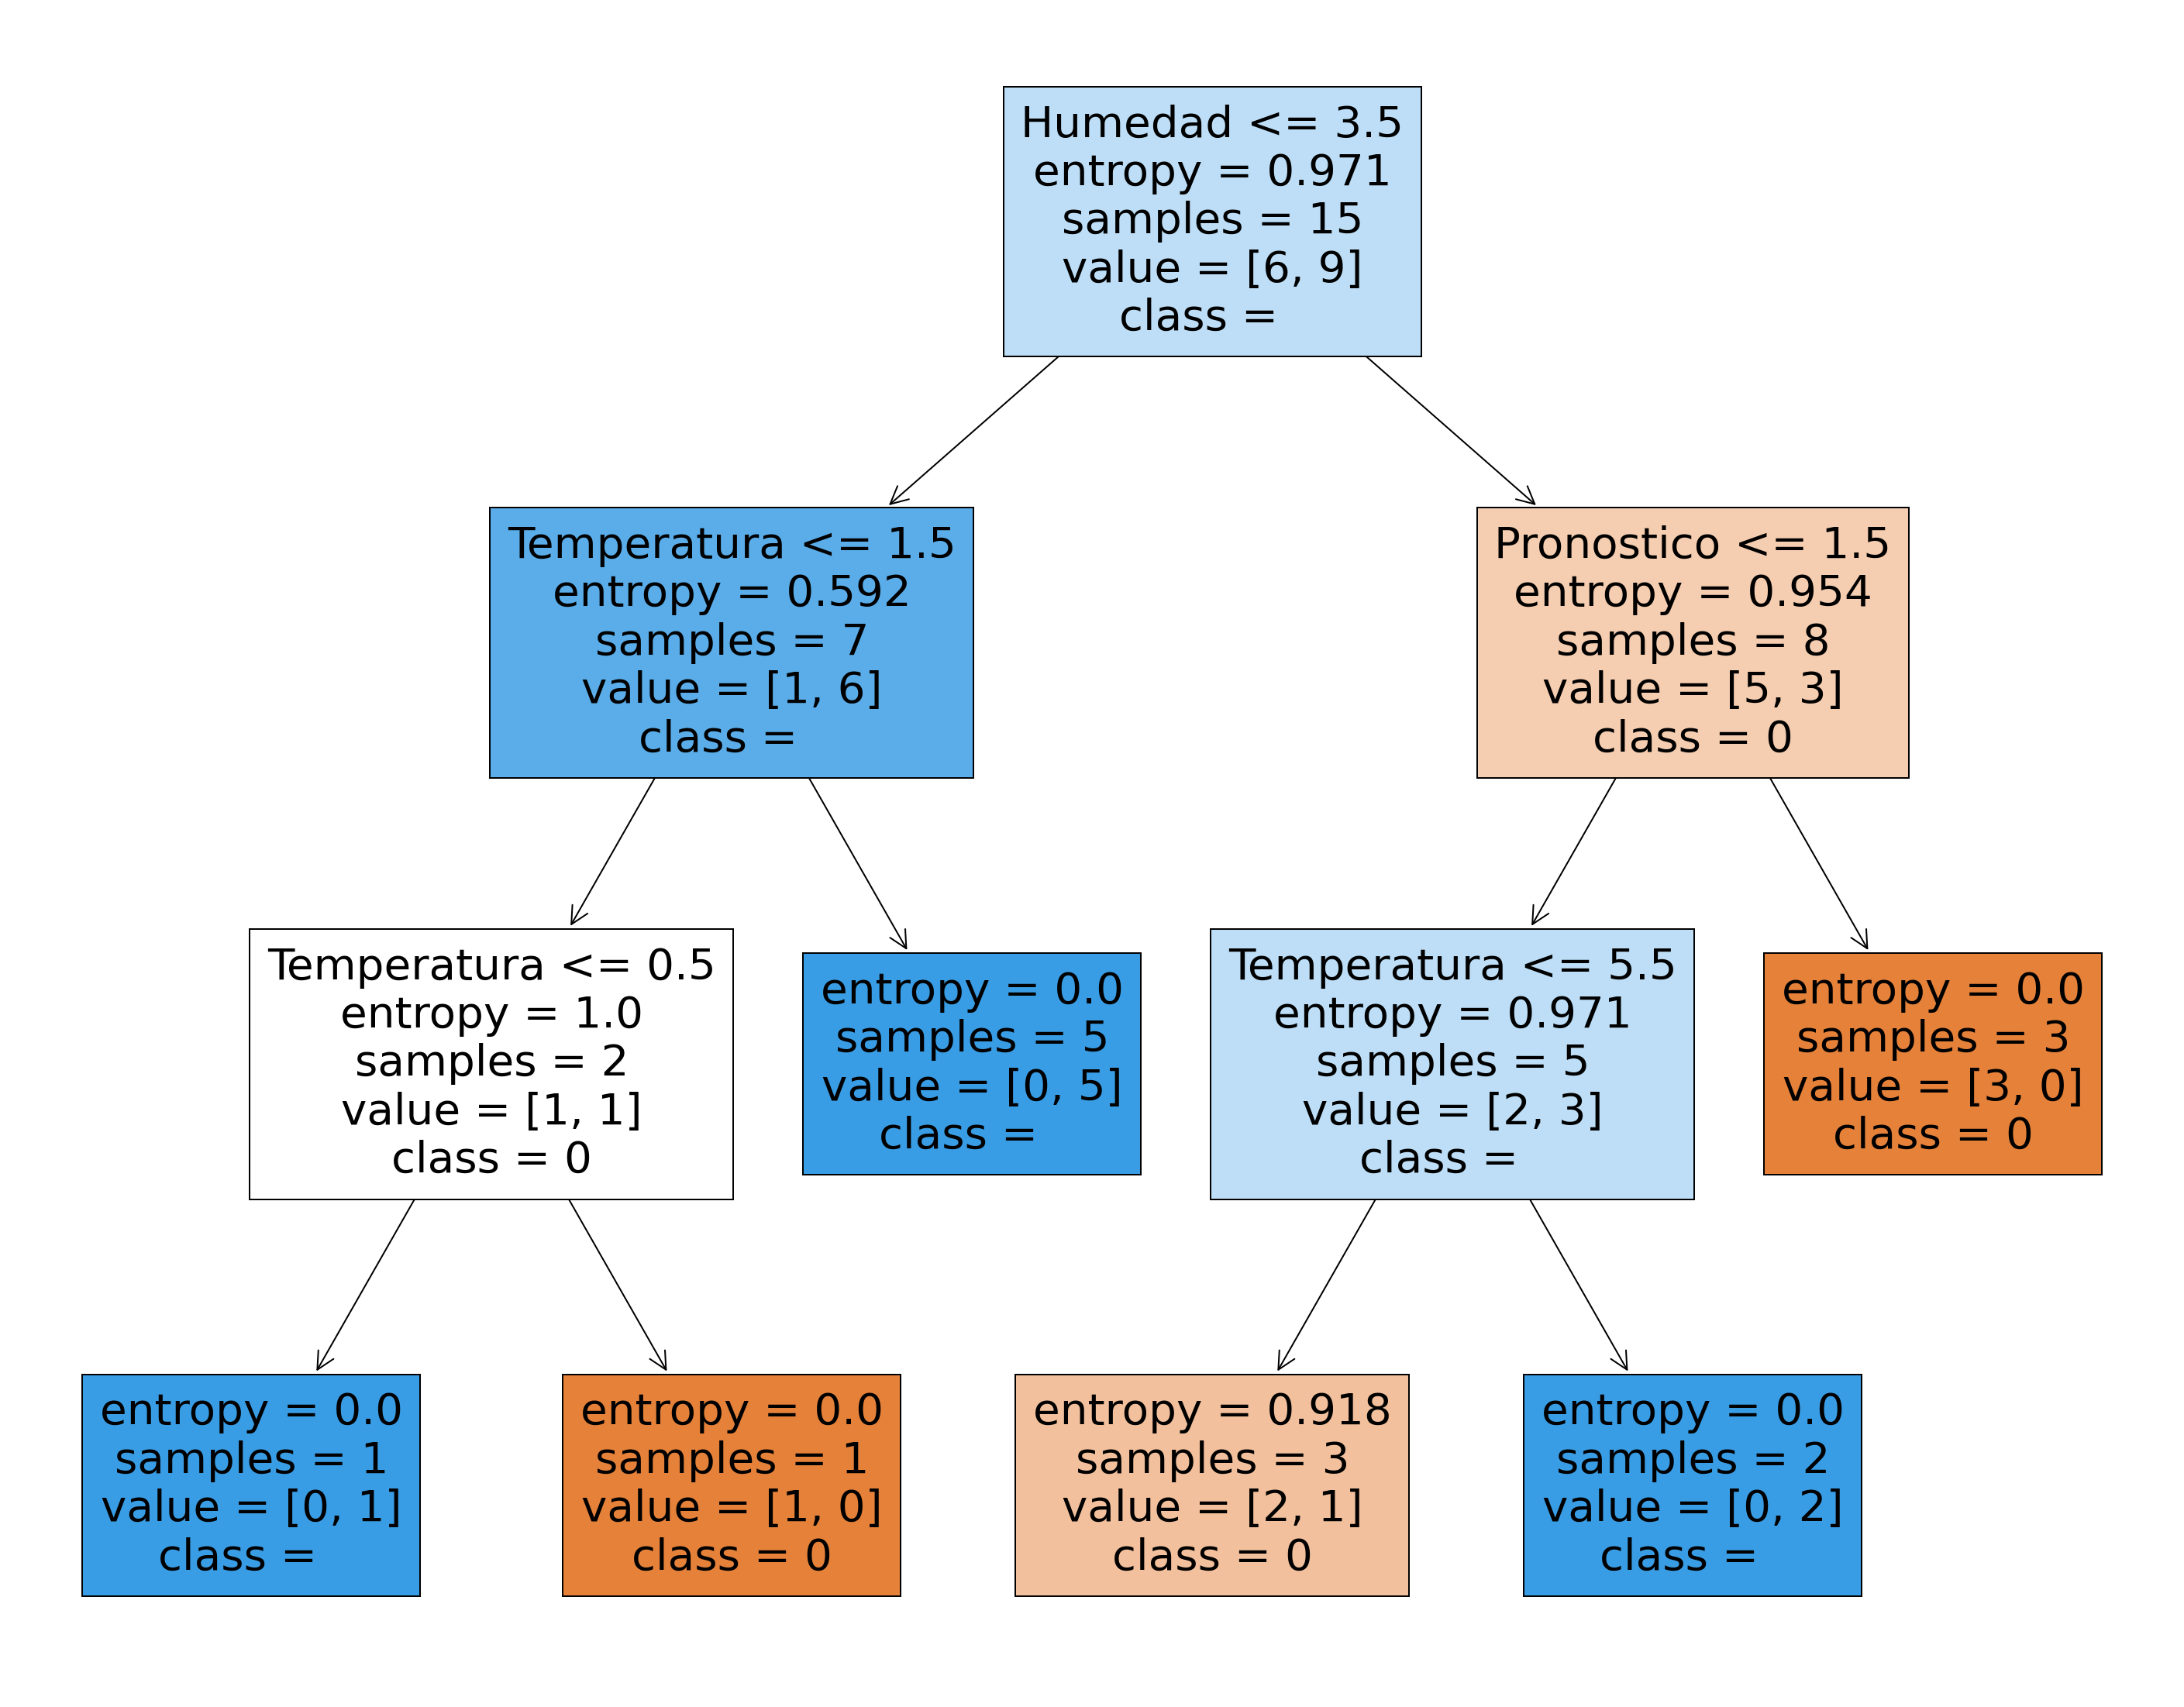

In [ ]:
#import pandas as pd

###plt.rcParams['figure.figsize'] = [17, 7]

#print(type(x_train_0))
dataset = x_train_0
#print(dataset)

# give custom names to the features
#dataset.columns = ['Pronostico','Temperatura','Humedad','Ventoso']
# Now add the label as a column
dataset['Jugar'] = y_train


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clima_classifier, 
                   feature_names=dataset.columns,  
                   class_names=str(dataset['Jugar']),
                   filled=True)


In [ ]:
##################################################################
######################### DUMMIES ################################
##################################################################
from sklearn import preprocessing

#Entropia (entropy): Es la cantidad de desorden de la información, o la cantidad de aleatoriedad en los datos
#Gini: Criterio para minimizar la probabilidad de error en la clasificación
#Error de clasificación: (classification error)


In [ ]:
val_features = ['Pronostico','Temperatura','Humedad','Ventoso']
x_train_0 = df_dt_clima[val_features]
#print(x_train_0)

y_train_0 = df_dt_clima[['Jugar']]
#print(y_train_0)

In [ ]:
#print(x_train_0)
#print(y_train_0)

x_train_0_gd=pd.get_dummies(x_train_0)
#x_train_0_gd.head()
print(x_train_0_gd)

#########################################################################################
#############################PROBAR CON LOS 2 ###########################################
#########################################################################################

#y_train_0_gd=pd.DataFrame(y_train_0) 
y_train_0_gd=pd.get_dummies(y_train_0)

#y_train_0_gd.head()
#print(y_train_0_gd)


    Temperatura  Humedad  Pronostico_lluvioso  Pronostico_nublado  \
0            85       85                    0                   0   
1            80       90                    0                   0   
2            83       86                    0                   1   
3            70       96                    1                   0   
4            68       80                    1                   0   
5            65       70                    1                   0   
6            64       65                    0                   1   
7            72       95                    0                   0   
8            69       70                    0                   0   
9            75       80                    1                   0   
10           75       70                    0                   0   
11           72       90                    0                   1   
12           81       75                    0                   1   
13           71       91          

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_0_gd, y_train_0_gd, test_size=0.30, random_state=1, stratify=y_train_0_gd)  # Una división para que la proporción de valores en la muestra producida sea la misma que la proporción de valores proporcionados para estratificar el parámetro.
                                                                                                                                        # Por ejemplo, si la variable y es una variable categórica binaria con valores 0 y 1 y hay un 25 % de ceros y un 75 % de unos, estratificar=y se asegurará de que su división aleatoria tenga un 25 % de ceros y un 75 % de unos
print("Numero de ejemplos para entrenar", len(x_train))
print("Numero de ejemplos para probar", len(x_test))



Numero de ejemplos para entrenar 10
Numero de ejemplos para probar 5


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

pipe_steps = [('scaler', StandardScaler()), ('descT', DecisionTreeClassifier(random_state = 1) )]
check_params = {'descT__criterion':['gini','entropy'], 'descT__max_depth': np.arange(3,15)}
pipeline=Pipeline(pipe_steps)
print(pipeline)



Pipeline(steps=[('scaler', StandardScaler()),
                ('descT', DecisionTreeClassifier(random_state=1))])


In [ ]:
from tqdm import tqdm_notebook as tqdm

print('Empieza el entrenamiento para encontrar los parametros de DecisionTreeClassifier()')
import warnings
warnings.filterwarnings("ignore")

for cv in tqdm(range(3,6)):
	create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
	create_grid.fit(x_train, y_train)
	print("score for %d fold CV := %3.2f" %(cv, create_grid.score(x_test, y_test)))
	print(create_grid.best_params_)

Empieza el entrenamiento para encontrar los parametros de DecisionTreeClassifier()


  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV := 0.80
{'descT__criterion': 'gini', 'descT__max_depth': 3}
score for 4 fold CV := 0.80
{'descT__criterion': 'gini', 'descT__max_depth': 3}
score for 5 fold CV := 0.80
{'descT__criterion': 'entropy', 'descT__max_depth': 3}


In [ ]:
dt_clima_classifier_2 = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
dt_clima_classifier_2 = dt_clima_classifier_2.fit(x_train, y_train)

y_pred        = dt_clima_classifier_2.predict(x_train)
print('Precisión Train:', accuracy_score(y_train, y_pred))

y_test_pred        = dt_clima_classifier_2.predict(x_test)
print('Precisión Test:', accuracy_score(y_test, y_test_pred))

#print('Exactitud:', precision_score(y_train, y_pred))
#print('Exhaustividad:', recall_score(y_train, y_pred))

print('\n')

Precisión Train: 0.9
Precisión Test: 0.8




|--- feature_3 <= 0.50
|   |--- feature_1 <= 95.50
|   |   |--- feature_1 <= 85.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  85.00
|   |   |   |--- class: 1
|   |--- feature_1 >  95.50
|   |   |--- class: 0
|--- feature_3 >  0.50
|   |--- class: 0



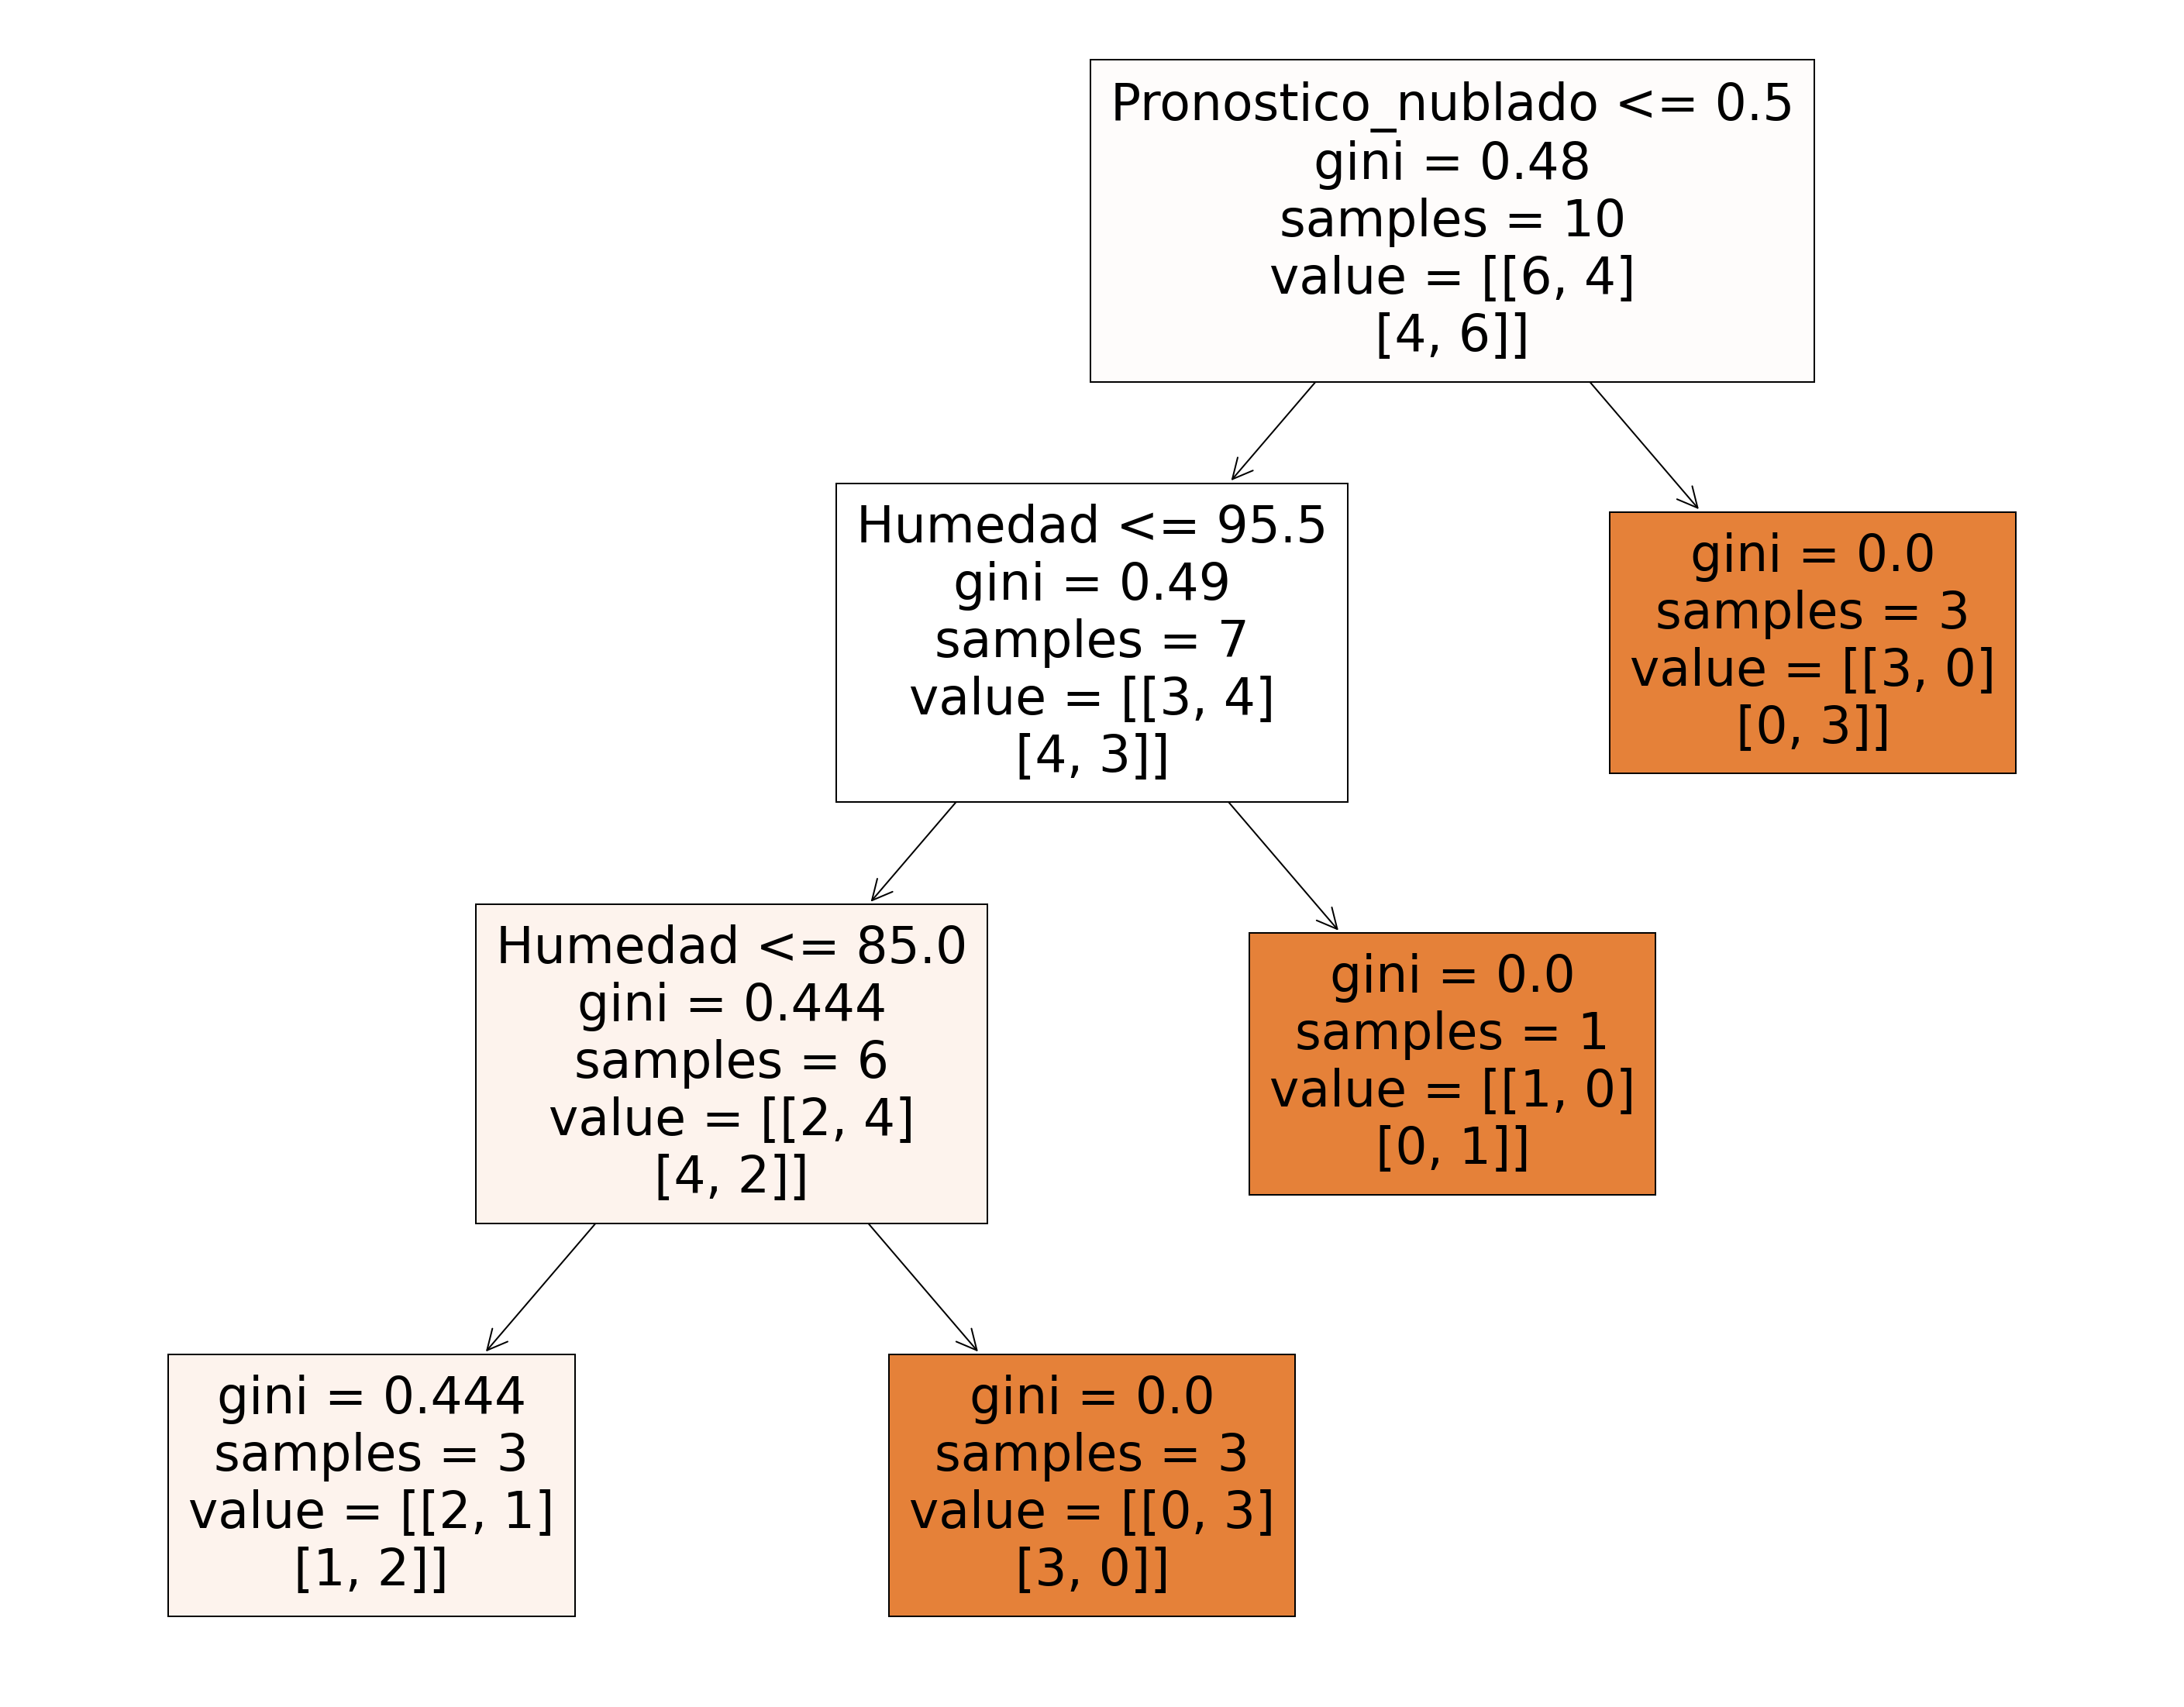

In [ ]:
text_representation = tree.export_text(dt_clima_classifier_2)
print(text_representation)

with open("ds_clima_decistion_tree_2.log", "w") as fout:
    fout.write(text_representation)


#import pandas as pd

plt.rcParams['figure.figsize'] = [17, 7]

#print(type(x_train_0))
dataset = x_train
#print(dataset)
#print(y_train)


dataset[['Jugar_NO', 'Jugar_SI']] = y_train
#dataset[['Jugar']] = y_train


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clima_classifier_2
                   , feature_names=dataset.columns  
#                   , class_names=str(dataset[['Jugar']])
                   , class_names=str(dataset[['Jugar_NO', 'Jugar_SI']])
                   , filled=True
                   )

In [ ]:
###No se puede porque "y" tiene 2 clases JUGAR_SI, JUGAR_NO
##from sklearn.metrics import roc_curve, auc
##false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
##roc_auc = auc(false_positive_rate, recall)

##print('AUC:', auc(false_positive_rate, recall))

##plot(false_positive_rate, recall, 'b')
##plot([0, 1], [0, 1], 'r--')
##title('AUC = %0.2f' % roc_auc)

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

ValueError: ignored

In [ ]:
y_pred     = dt_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 1)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [ ]:
y_pred     = dt_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [ ]:
print(dt_classifier.feature_importances_)

In [ ]:
best_features = np.arange(len(dt_classifier.feature_importances_))
best_features = np.delete(best_features, np.argmin(dt_classifier.feature_importances_))

dt_classifier = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 1)
dt_classifier.fit(x_train[:, best_features], y_train)
y_pred        = dt_classifier.predict(x_train[:,best_features])

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 10,
                                       random_state = 1).fit(x_train, y_train)
y_pred        = rf_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

In [ ]:
y_pred     = rf_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

In [ ]:
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 10,
                                       max_depth = 4,
                                       random_state = 1)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

In [ ]:
y_pred     = rf_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

## OTROS MODELOS SUPERVISADOS
### Maquinas de vector de soporte

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(x_train, y_train)
y_pred         = svm_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

In [ ]:
y_pred     = svm_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

### Naïve Bayes


In [ ]:
from sklearn import naive_bayes

nb_classifier = naive_bayes.GaussianNB().fit(x_train, y_train)
y_pred        = nb_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

In [ ]:
y_pred     = nb_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)